In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the Titanic dataset
titanic_df = pd.read_csv('/content/train.csv')

# Display the first few rows of the dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Check for missing values
print(titanic_df.isnull().sum())

# Impute missing values for age with the median age
median_age = titanic_df['Age'].median()
titanic_df['Age'].fillna(median_age, inplace=True)

# Drop rows with missing values for embarked
titanic_df.dropna(subset=['Embarked'], inplace=True)

# Convert categorical variables to numerical
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})

# Convert embarked to numerical using one-hot encoding
embarked_dummies = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')
titanic_df = pd.concat([titanic_df, embarked_dummies], axis=1)

# Drop unnecessary columns
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Display the first few rows of the cleaned dataset
print(titanic_df.head())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
0         0       3    0  22.0      1      0   7.2500           0           0   
1         1       1    1  38.0      1      0  71.2833           1           0   
2         1       3    1  26.0      0      0   7.9250           0           0   
3         1       1    1  35.0      1      0  53.1000           0           0   
4         0       3    0  35.0      0      0   8.0500           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  


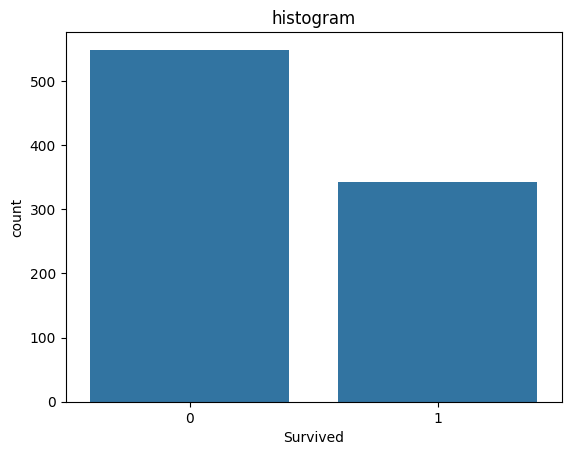

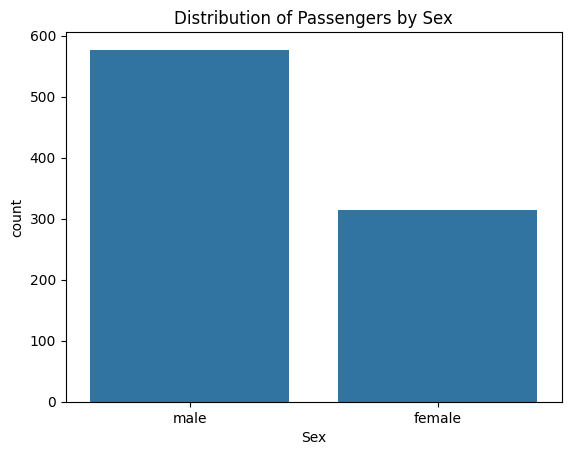

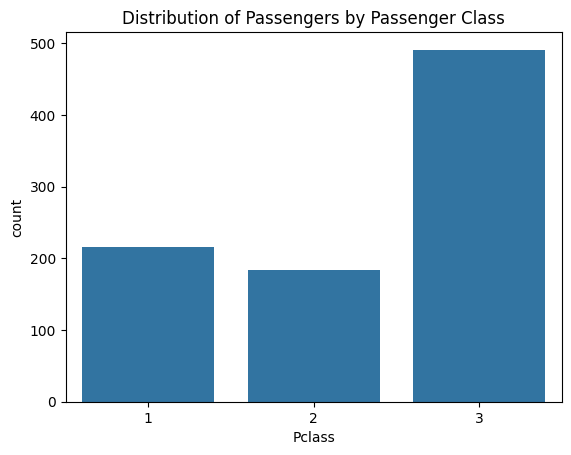

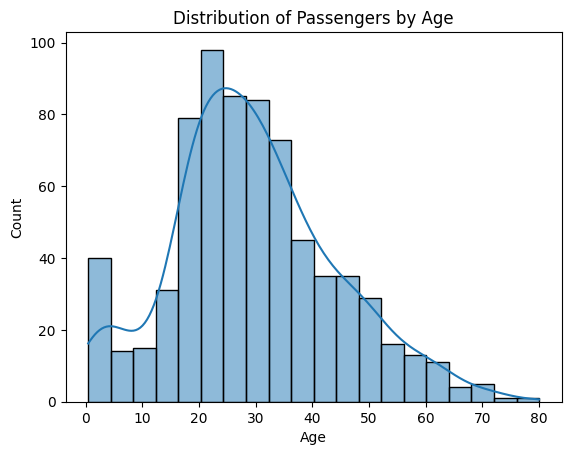

<ipython-input-10-086b13d5d55b>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


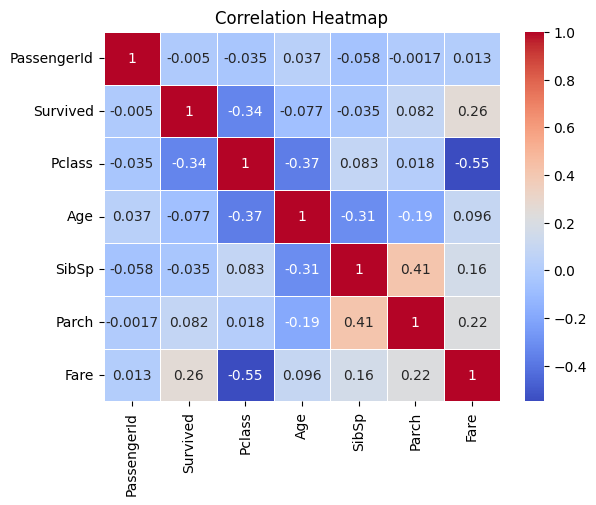

In [10]:
import seaborn as sns

# Distribution of passengers by survival
sns.countplot(x='Survived', data=titanic_df)
plt.title('histogram')
plt.show()

# Distribution of passengers by sex
sns.countplot(x='Sex', data=titanic_df)
plt.title('Distribution of Passengers by Sex')
plt.show()

# Distribution of passengers by passenger class
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Distribution of Passengers by Passenger Class')
plt.show()

# Distribution of passengers by age
sns.histplot(titanic_df['Age'], bins=20, kde=True)
plt.title('Distribution of Passengers by Age')
plt.xlabel('Age')
plt.show()

# Correlation heatmap
correlation_matrix = titanic_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
